<a href="https://colab.research.google.com/github/Devansharma/Air_Quaity_Index_Prediction/blob/master/LinearRegression_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import pickle

In [4]:
df = pd.read_csv('Real_Combine.csv')

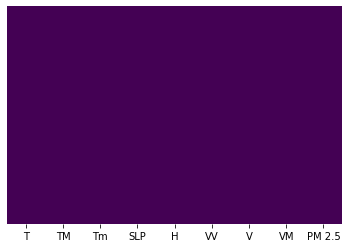

In [9]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [8]:
df = df.dropna()

In [10]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

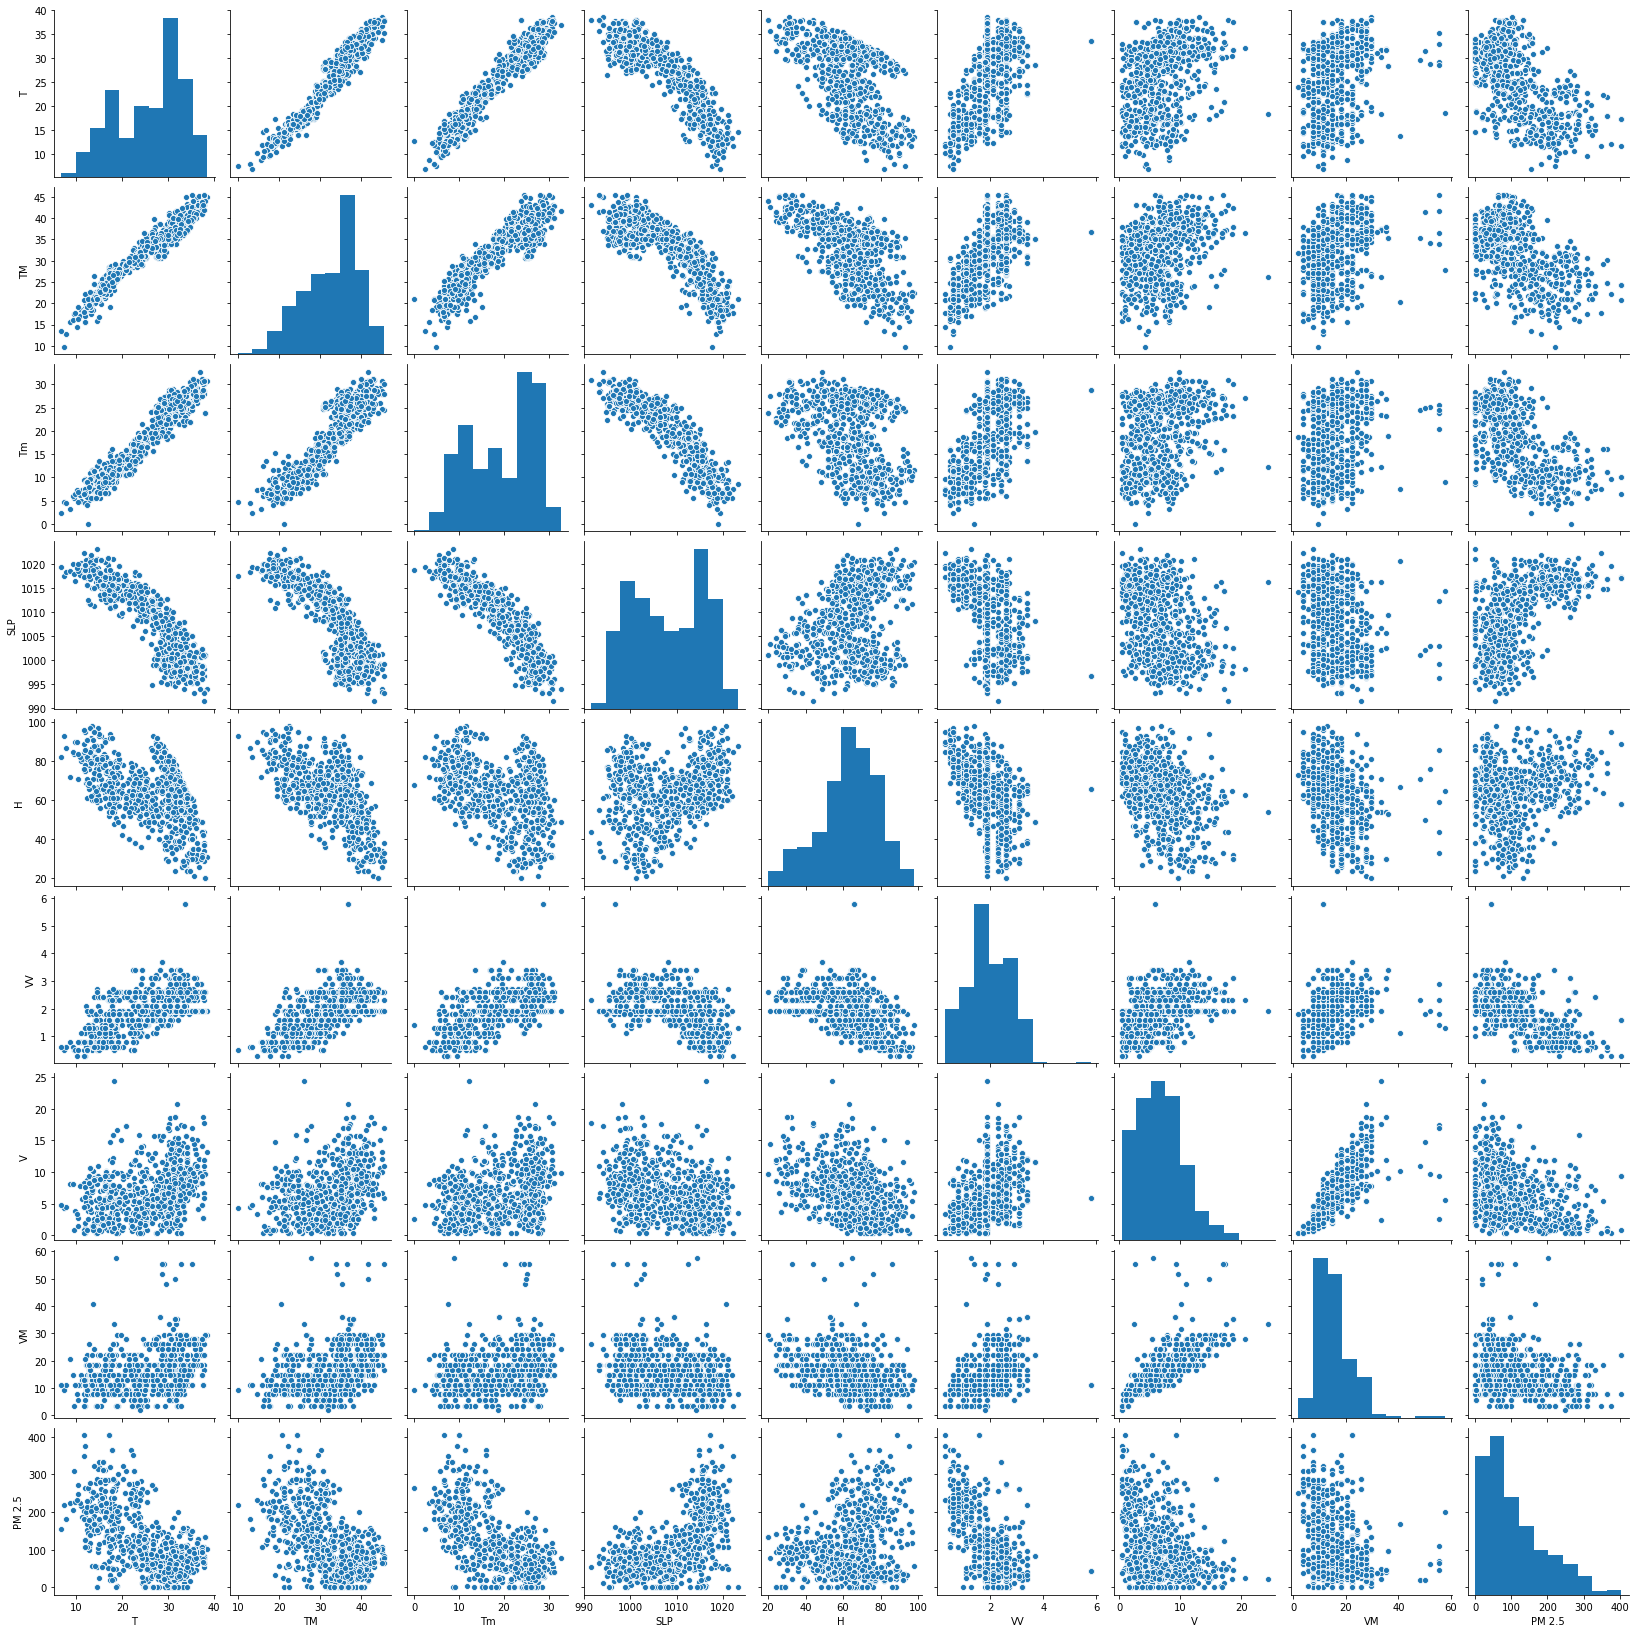

In [11]:
sns.pairplot(df)

In [12]:
df.corr()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
T,1.000000,0.967536,0.953719,-0.881409,-0.509299,0.640792,0.301994,0.287738,-0.631462
TM,0.967536,1.000000,0.892031,-0.822958,-0.586681,0.606945,0.292949,0.297011,-0.568409
Tm,0.953719,0.892031,1.000000,-0.917518,-0.287357,0.577240,0.296225,0.266782,-0.673824
SLP,-0.881409,-0.822958,-0.917518,1.000000,0.240256,-0.517915,-0.329838,-0.310704,0.623187
H,-0.509299,-0.586681,-0.287357,0.240256,1.000000,-0.465374,-0.380575,-0.362177,0.138005
VV,0.640792,0.606945,0.577240,-0.517915,-0.465374,1.000000,0.376873,0.342442,-0.573941
V,0.301994,0.292949,0.296225,-0.329838,-0.380575,0.376873,1.000000,0.775655,-0.268530
VM,0.287738,0.297011,0.266782,-0.310704,-0.362177,0.342442,0.775655,1.000000,-0.215854
PM 2.5,-0.631462,-0.568409,-0.673824,0.623187,0.138005,-0.573941,-0.268530,-0.215854,1.000000


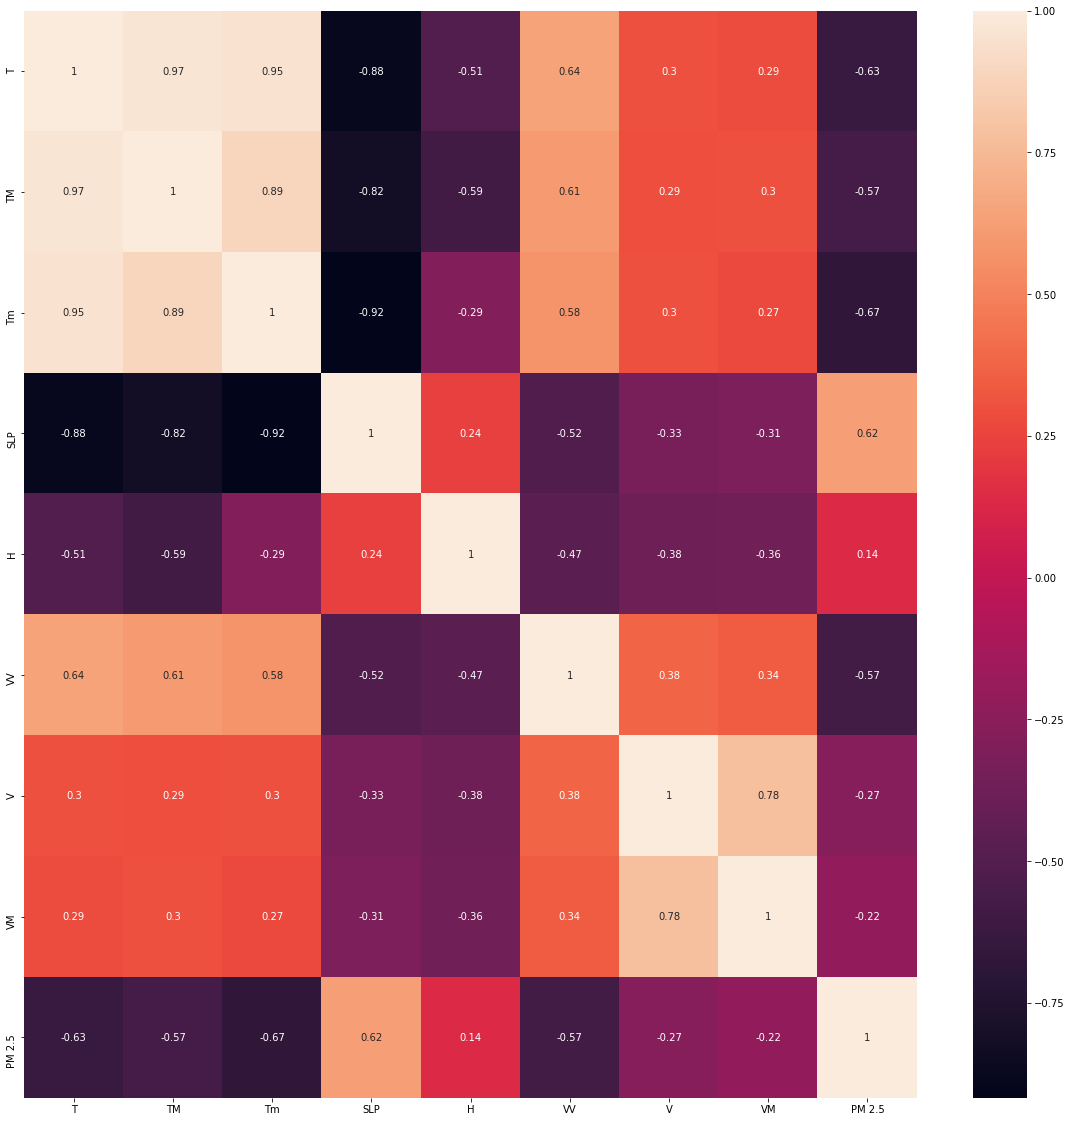

In [13]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
_ = sns.heatmap(df[top_corr_features].corr(), annot=True)

In [14]:
from sklearn.ensemble import ExtraTreesRegressor

In [15]:
model=ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [16]:
print(model.feature_importances_)

[0.21917681 0.08130068 0.22704537 0.11466352 0.08697128 0.17707809
 0.05404729 0.03971695]


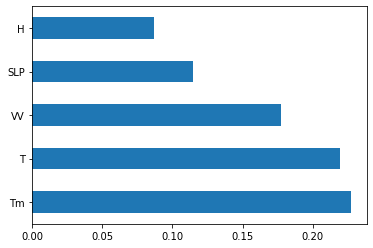

In [18]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

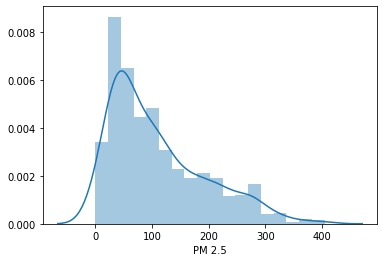

In [19]:
sns.distplot(y)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [36]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
print("R2 score(on train set): {}".format(model.score(X_train, y_train)))

R2 score(on train set): 0.536075767556272


In [38]:
print("R2 score(on test set): {}".format(model.score(X_test, y_test)))

R2 score(on test set): 0.5228951917854745


In [43]:
score = cross_val_score(model, X, y, cv = 5)

In [44]:
print("Cross validation score: {}".format(score.mean()))

Cross validation score: 0.47105693048073916


In [45]:
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
T,-2.101598
TM,0.208947
Tm,-4.245147
SLP,-0.030688
H,-1.187661
VV,-38.285342
V,-2.517344
VM,0.651836


In [46]:
prediction = model.predict(X_test)

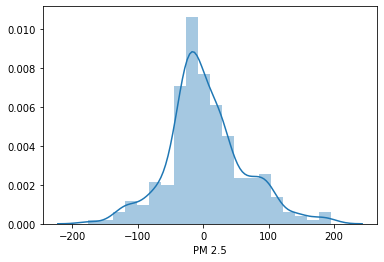

In [49]:
sns.distplot(y_test-prediction)

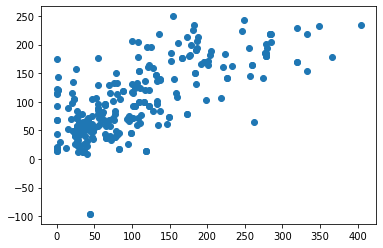

In [50]:
plt.scatter(y_test,prediction)

In [53]:
print("MAE: ",metrics.mean_absolute_error(y_test, prediction))
print("MSE: ",metrics.mean_squared_error(y_test, prediction))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE:  44.34118150953593
MSE:  3533.389754513456
RMSE:  59.442322923262815


In [55]:
file = open('regressor_model.pkl', 'wb')
pickle.dump(model, file)